# Customer Churn

Customer Churn refers to when a customer wats to end his contract with a company. In the business side, every company want to know how many customer ended his contract to evaluate their marketing performance.

Companies often spend heavily to acquire new customers through sales and marketing efforts. They do this in the hope that these investments will be paid back several times over during the customer’s lifetime. But if customers leave earlier than expected, the company often ends up footing the acquisition bill. The longer that brands can hold onto their customers, the greater value each customer is worth over their lifespan. 

Predicting churn is important only to the extent that effective action can be taken to retain the customer before it is too late. 

Ultimately, the goal for businesses is to identify customers who are at risk of leaving and put more resources into keeping existing customers. Doing both of these helps reduce churn and save money. 

By modeling custumer churn, companies can multiply the ROI of their sales and marketing efforts many times over. Provided, that is, that they know how to measure it.

In this project, we will implement some of Machine Learning models for classification (Logistic Regression, K-Neighrest Neighbors, Random Forest....) so as to choose which model will predict better the churn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
plt.style.use('ggplot')
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/abdel/Documents/Projects/Customer churn/Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Convert String and space to NaN value

In [3]:
data['TotalCharges'] = data['TotalCharges'].replace(r' ', np.nan, regex=True)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

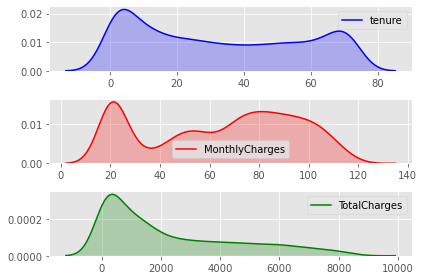

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
sns.kdeplot(data["tenure"], shade=True, color="b",ax = ax1)
sns.kdeplot(data["MonthlyCharges"], shade=True, color="r", ax = ax2)
sns.kdeplot(data["TotalCharges"], shade=True, color="g", ax = ax3)
fig.tight_layout()
plt.show(fig)

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Show unique values of each column, this will allow us to change some values, and facilitate coding them. 

In [6]:
for col in data.columns:
    display(col)
    display(data[col].unique())

'customerID'

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

'gender'

array(['Female', 'Male'], dtype=object)

'SeniorCitizen'

array([0, 1], dtype=int64)

'Partner'

array(['Yes', 'No'], dtype=object)

'Dependents'

array(['No', 'Yes'], dtype=object)

'tenure'

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

'PhoneService'

array(['No', 'Yes'], dtype=object)

'MultipleLines'

array(['No phone service', 'No', 'Yes'], dtype=object)

'InternetService'

array(['DSL', 'Fiber optic', 'No'], dtype=object)

'OnlineSecurity'

array(['No', 'Yes', 'No internet service'], dtype=object)

'OnlineBackup'

array(['Yes', 'No', 'No internet service'], dtype=object)

'DeviceProtection'

array(['No', 'Yes', 'No internet service'], dtype=object)

'TechSupport'

array(['No', 'Yes', 'No internet service'], dtype=object)

'StreamingTV'

array(['No', 'Yes', 'No internet service'], dtype=object)

'StreamingMovies'

array(['No', 'Yes', 'No internet service'], dtype=object)

'Contract'

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

'PaperlessBilling'

array(['Yes', 'No'], dtype=object)

'PaymentMethod'

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

'MonthlyCharges'

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

'TotalCharges'

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

'Churn'

array(['No', 'Yes'], dtype=object)

([<matplotlib.patches.Wedge at 0x1f4fa0ff898>,
 [Text(-0.016436707732256382, 1.0998771907076375, 'Homme'),
  Text(0.016436707732256247, -1.0998771907076375, 'Femme')],
 [Text(-0.008965476944867117, 0.5999330131132566, '50.48 %'),
  Text(0.008965476944867044, -0.5999330131132566, '49.52 %')])

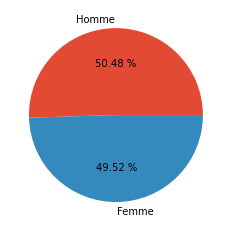

In [7]:
 # Plot Distribution of Gender variable
Homme = data.loc[data["gender"] == 'Male'].count()[0]
Femme = data.loc[data["gender"] == 'Female'].count()[0]

labels = ['Homme', 'Femme']
plt.pie([Homme, Femme], labels = labels, autopct = "%.2f %%")

([<matplotlib.patches.Wedge at 0x1f4fa14ed68>,
 [Text(0.7393679040381536, 0.8144538676181899, 'Churn'),
  Text(-0.7393679802928249, -0.814453798393567, 'No Churn')],
 [Text(0.403291584020811, 0.4442475641553763, '26.54 %'),
  Text(-0.40329162561426807, -0.44424752639649107, '73.46 %')])

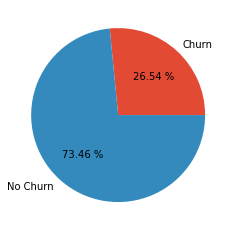

In [8]:
 # Plot Distribution of Gender variable
Yes = data.loc[data["Churn"] == 'Yes'].count()[0]
No = data.loc[data["Churn"] == 'No'].count()[0]

labels = ['Churn', 'No Churn']
plt.pie([Yes, No], labels = labels, autopct = "%.2f %%")

We have imbalanced data, so we must deal with when modeling, so as to get good results.

Text(0, 0.5, 'Number of Churn')

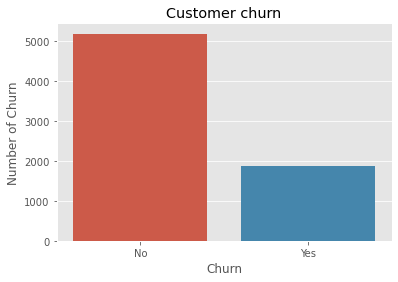

In [9]:
y = data["Churn"].value_counts()
#print (y)
sns.barplot(y.index, y.values)
plt.title('Customer churn')
# Set x-axis label
plt.xlabel('Churn')
# Set y-axis label
plt.ylabel('Number of Churn')

### Encoding variables

In [10]:
# Convert booeleen Variables to 0 and 1

columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in columns:
    data[col].replace(to_replace = 'Yes', value = 1, inplace = True)
    data[col].replace(to_replace = 'No', value = 0, inplace = True)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


Here we deal with feaures who indicate if a customer has a service or not, in order to  code it with Zero or one.

In [11]:

columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies']

for col in columns:
    data[col].replace(to_replace = 'No phone service', value = 'No', inplace = True)
    data[col].replace(to_replace = 'No internet service', value = 'No', inplace = True)
for col in columns:
    data[col].replace(to_replace = 'Yes', value = 1, inplace = True)
    data[col].replace(to_replace = 'No', value = 0, inplace = True)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [12]:
# Delete CustomerID
data = data.drop('customerID', axis = 1)
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1


In [13]:
data.MultipleLines.unique()

array([0, 1], dtype=int64)

For the rest of non encoded variables, we use the function get_dummies, this last will increase dimmensionality.

In [14]:
df = pd.get_dummies(data)

In [15]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [16]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
display(data.shape)
display(df.shape)

Notice that we have now 28 features.

In [17]:
df.isna().sum()

SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_Month-to-month           

In [18]:
df['TotalCharges'].fillna((df['TotalCharges'].mean()), inplace=True)

In [19]:
na_columns = df.columns[df.isna().any()]
df[na_columns].isna().sum().sort_values(ascending=False)

Series([], dtype: float64)

We imputed succesffuly our missing values, now we normalize data to start building our Machine Learning models

This paper (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648438/) argues that feature selection before SMOTE (Synthetic Minority Oversampling TEchnique) is preferred.

Performing variable selection after using SMOTE should be done with some care because most variable selection methods assume that the samples are independent

### Preparing our Train and Test datasets

In [25]:
X = df.iloc[:, :-13]
y = df.iloc[: , -13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2020)

### Features scaling:

It allows to put all features in the same scale, because we need to avoid that features can be dominated by others for some Machine Learning models.


In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train.iloc[:, :-13] =sc.fit_transform(X_train.iloc[:, :-13])
X_test.iloc[:, :-13] =sc.fit_transform(X_test.iloc[:, :-13])

### Balanced Data

In [27]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2020)
X_balanced, y_balanced = sm.fit_resample(X_train, y_train)

In [28]:
print('After OverSampling, the shape of train_X: {}'.format(X_balanced.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced==0)))

After OverSampling, the shape of train_X: (7188, 15)
After OverSampling, the shape of train_y: (7188,) 

After OverSampling, counts of label '1': 3594
After OverSampling, counts of label '0': 3594


## Building prediction Model

### Logistic Regerssion

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logit_model = LogisticRegression(solver='lbfgs')
LR_model = logit_model.fit(X_balanced,y_balanced)
LR_model.score(X_balanced,y_balanced)

0.8117696160267112

In [31]:
LR_model.score(X_test,y_test)

0.7799337434926644

In [32]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf1 = confusion_matrix(y_test, LR_model.predict(X_test))

<AxesSubplot:>

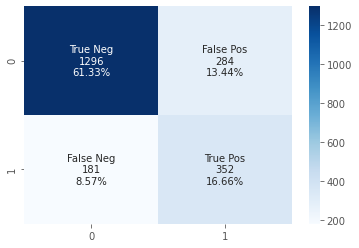

In [33]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf1.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf1, annot=labels, fmt='', cmap='Blues')

### Metrics for Logistic Regression

In [64]:
print('Precision: {:.2f}'.format(352/(352+284)*100),('%'))
print('Recall: {:.2f}'.format(352/(352+181)*100),('%'))
print('Accuracy: {:.2f}'.format((352+1296)/(352+1296+284+181)*100),('%'))
print('F1- Score: {:.2f}'.format(2*((352/(352+284))*(352/(352+181))/(352/(352+284)+352/(352+181)))*100),('%'))

Precision: 55.35 %
Recall: 66.04 %
Accuracy: 77.99 %
F1- Score: 60.22 %


## Gaussian Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB_model = NB.fit(X_balanced, y_balanced)
NB_model.score(X_balanced, y_balanced)

0.7321925431274346

In [66]:
NB_model.score(X_test, y_test)

0.6881211547562707

<AxesSubplot:>

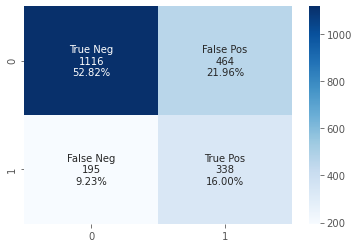

In [67]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf2 = confusion_matrix(y_test, NB_model.predict(X_test))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf2.flatten()/np.sum(conf2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf2, annot=labels, fmt='', cmap='Blues')

### Metrics for Gaussian Naive Bayes

In [69]:
print('Precision: {:.2f}'.format(338/(338+464)*100),('%'))
print('Recall: {:.2f}'.format(338/(338+195)*100),('%'))
print('Accuracy: {:.2f}'.format((338+1116)/(338+1116+464+195)*100),('%'))
print('F1- Score: {:.2f}'.format(2*((338/(338+464))*(338/(338+195))/(338/(338+464)+338/(338+195)))*100),('%'))

Precision: 42.14 %
Recall: 63.41 %
Accuracy: 68.81 %
F1- Score: 50.64 %


## Linear Discriminant Analysis

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA_model = LDA.fit(X_balanced, y_balanced)
LDA_model.score(X_balanced, y_balanced)

0.8116304952698943

In [71]:
LDA_model.score(X_test,y_test)

0.7652626597255088

<AxesSubplot:>

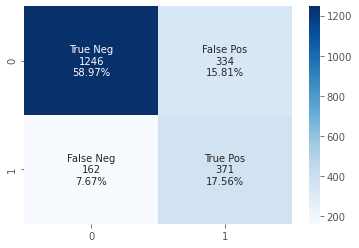

In [72]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf3 = confusion_matrix(y_test, LDA_model.predict(X_test))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf3.flatten()/np.sum(conf3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf3, annot=labels, fmt='', cmap='Blues')


### Metrics for Linear Discriminant Analysis

In [73]:
print('Precision: {:.2f}'.format(371/(371+334)*100),('%'))
print('Recall: {:.2f}'.format(371/(371+162)*100),('%'))
print('Accuracy: {:.2f}'.format((371+1246)/(371+1246+334+162)*100),('%'))
print('F1- Score: {:.2f}'.format(2*((371/(371+334))*(371/(371+162))/(371/(371+334)+371/(371+162)))*100),('%'))

Precision: 52.62 %
Recall: 69.61 %
Accuracy: 76.53 %
F1- Score: 59.94 %


## Random Forest

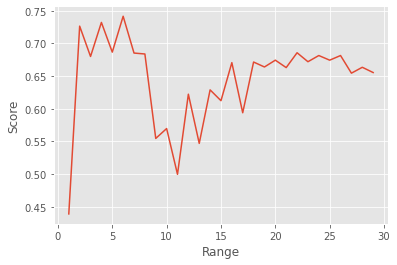

In [89]:
RF_score = []
for each in range(1,30):
    RF = RandomForestClassifier(n_estimators = each, random_state = 1)
    RF.fit(X_balanced,y_balanced)
    RF_score.append(RF.score(X_test,y_test))
    
plt.plot(range(1,30),knn_score)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [74]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 8)

RF_model = RF.fit(X_balanced, y_balanced)
RF_model.score(X_balanced, y_balanced)

0.9809404563160824

In [75]:
RF_model.score(X_test, y_test)

0.7491717936583058

<AxesSubplot:>

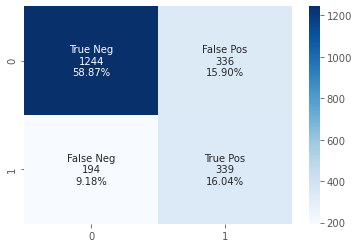

In [76]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf4 = confusion_matrix(y_test, RF_model.predict(X_test))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf4.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf4.flatten()/np.sum(conf4)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf4, annot=labels, fmt='', cmap='Blues')

In [77]:
print('Precision: {:.2f}'.format(339/(339+336)*100),('%'))
print('Recall: {:.2f}'.format(339/(339+194)*100),('%'))
print('Accuracy: {:.2f}'.format((339+1244)/(339+1244+336+194)*100),('%'))
print('F1- Score: {:.2f}'.format(2*((339/(339+336))*(339/(339+194))/(339/(339+336)+339/(339+194)))*100),('%'))

Precision: 50.22 %
Recall: 63.60 %
Accuracy: 74.92 %
F1- Score: 56.13 %


## SVM

In [78]:
from sklearn.svm import SVC

In [79]:
SVC = SVC(gamma='auto')
SVC_model = SVC.fit(X_balanced, y_balanced)
SVC_model.score(X_balanced, y_balanced)

0.9624373956594324

In [80]:
SVC_model.score(X_test, y_test)

0.7581637482252721

<AxesSubplot:>

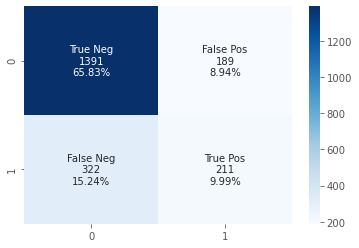

In [93]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf5 = confusion_matrix(y_test, SVC_model.predict(X_test))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf5.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf5.flatten()/np.sum(conf5)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf5, annot=labels, fmt='', cmap='Blues')

In [97]:
print('Precision: {:.2f}'.format(211/(211+189)*100),('%'))
print('Recall: {:.2f}'.format(211/(211+322)*100),('%'))
print('Accuracy: {:.2f}'.format((211+1391)/(211+1391+189+322)*100),('%'))
print('F1- Score: {:.2f}'.format(2*((211/(211+189))*(211/(211+322))/(211/(211+189)+211/(211+322)))*100),('%'))

Precision: 52.75 %
Recall: 39.59 %
Accuracy: 75.82 %
F1- Score: 45.23 %


# KNN

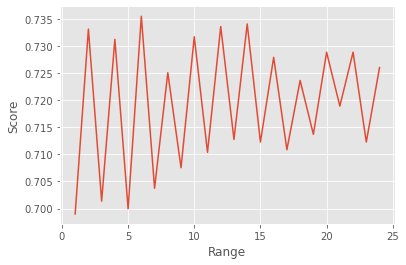

In [63]:
from sklearn.neighbors import KNeighborsClassifier
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(X_balanced,y_balanced)
    score_array.append(knn_loop.score(X_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [91]:
KNN = KNeighborsClassifier(n_neighbors = 6)
KNN_model = KNN.fit(X_balanced, y_balanced)
KNN_model.score(X_balanced, y_balanced)

0.8387590428491931

In [92]:
KNN_model.score(X_test, y_test)

0.735447231424515

<AxesSubplot:>

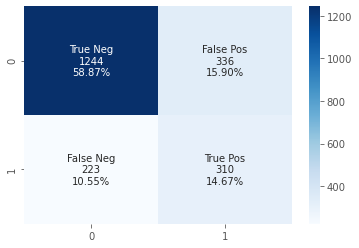

In [98]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf6 = confusion_matrix(y_test, KNN_model.predict(X_test))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf6.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf6.flatten()/np.sum(conf6)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf6, annot=labels, fmt='', cmap='Blues')

In [99]:
print('Precision: {:.2f}'.format(310/(310+336)*100),('%'))
print('Recall: {:.2f}'.format(310/(310+223)*100),('%'))
print('Accuracy: {:.2f}'.format((310+1244)/(310+1244+336+223)*100),('%'))
print('F1- Score: {:.2f}'.format(2*((310/(310+336))*(310/(310+223))/(310/(310+336)+310/(310+223)))*100),('%'))

Precision: 47.99 %
Recall: 58.16 %
Accuracy: 73.54 %
F1- Score: 52.59 %


## Summary of the different founded scores

<img src="Scores.png" style="width:600px;height:250px"/>

### Conclusion

- The choice of the metrics to evaluate all this models, depends to our main goal.
- Here, we have balanced our data in the beginning using SMOTE function, so we use accuracy for evaluation.
- Logistic regression gave us the best result to predict Churn Customer.
- We relied on F1-score since we have balanced our data.